# Hometask 

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [17]:
df = pd.read_csv('Groceries_dataset.csv')
df.head ()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

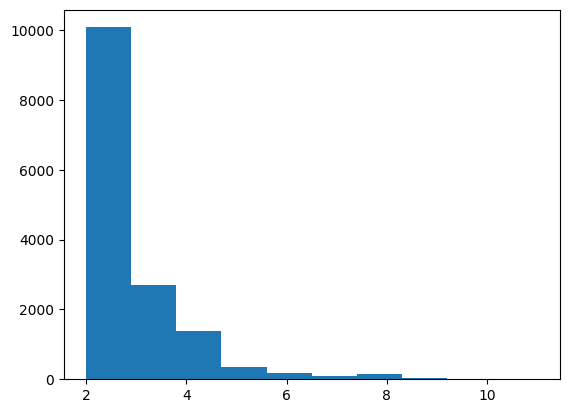

In [18]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [19]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [20]:
all_products = df['itemDescription'].unique()
print(f"Total products: {len(all_products)}")

Total products: 167


In [21]:
# One-hot encoding
df_onehot = pd.get_dummies(df['itemDescription'], dtype=float)
df = df.drop('itemDescription', axis=1)
df = df.join(df_onehot)
df.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2552,05-01-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2300,19-09-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1187,12-12-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3037,01-02-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
transaction = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum) #if customer bought multiple products on same day, We will consider it one transaction
transaction = transaction.reset_index()[all_products]

C:\Users\vfush\AppData\Local\Temp\ipykernel_27656\1197554924.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  transaction = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum) #if customer bought multiple products on same day, We will consider it one transaction
d:\Projects\pyProjects\data-camp-hometasks\.venv\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [23]:
# Replace non-zero values with name of the product
def replace_nonzero_with_product(row):
    for product in all_products:
        if row[product] > 0:
            row[product] = product
    return row

In [24]:
transaction = transaction.apply(replace_nonzero_with_product, axis=1)
transaction.head()

C:\Users\vfush\AppData\Local\Temp\ipykernel_27656\1507614038.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whole milk' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[product] = product
C:\Users\vfush\AppData\Local\Temp\ipykernel_27656\1507614038.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'canned beer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[product] = product
C:\Users\vfush\AppData\Local\Temp\ipykernel_27656\1507614038.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sausage' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row[product] = product
C:\Users\vfush\AppData\Local\Temp\ip

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0.0,whole milk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,whole milk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#remove rows with all zero values
transaction = [row[row != 0].tolist() for row in transaction.values if any(row != 0)]

In [43]:
transaction[:10] # Display first 10 transactions

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [70]:
rules = apriori(transaction, min_support=0.0003, min_confidance=0.5,min_lift=5)
association_results = list(rules)
association_results[:10] # Display first 10 rules

[RelationRecord(items=frozenset({'soups', 'seasonal products'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'seasonal products'}), items_add=frozenset({'soups'}), confidence=0.04716981132075471, lift=14.704205974842766), OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'seasonal products'}), confidence=0.10416666666666667, lift=14.704205974842768)]),
 RelationRecord(items=frozenset({'frozen vegetables', 'canned beer', 'brown bread'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brown bread'}), items_add=frozenset({'frozen vegetables', 'canned beer'}), confidence=0.008880994671403198, lift=6.644316163410303), OrderedStatistic(items_base=frozenset({'canned beer'}), items_add=frozenset({'frozen vegetables', 'brown bread'}), confidence=0.007122507122507123, lift=7.612433862433862), OrderedStatistic(items_base=frozenset({'frozen vegetables', 'brown bread'}), items_add=frozense

In [59]:
def print_top_rules(rules, top_n=10):
    sorted_rules = sorted(rules, 
                         key=lambda rule: max([os.lift for os in rule.ordered_statistics]), 
                         reverse=True)
    
    for rule in sorted_rules[:top_n]:
        print('rule.items=', list(rule.items))
        print('rule.support=', rule.support)

        for os in rule.ordered_statistics:
            print('\titems_base=', list(os.items_base))
            print('\tlifted_item =', list(os.items_add))
            print('\tlift=', os.lift)
            print('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print()


In [71]:
print_top_rules(association_results) 

rule.items= ['soups', 'seasonal products']
rule.support= 0.0003341575887188398
	items_base= ['seasonal products']
	lifted_item = ['soups']
	lift= 14.704205974842766
	confidence (i.e. cond prob ['soups'] if ['seasonal products'])= 0.04716981132075471

	items_base= ['soups']
	lifted_item = ['seasonal products']
	lift= 14.704205974842768
	confidence (i.e. cond prob ['seasonal products'] if ['soups'])= 0.10416666666666667

rule.items= ['fruit/vegetable juice', 'curd', 'sausage']
rule.support= 0.0003341575887188398
	items_base= ['curd']
	lifted_item = ['fruit/vegetable juice', 'sausage']
	lift= 5.497868900646679
	confidence (i.e. cond prob ['fruit/vegetable juice', 'sausage'] if ['curd'])= 0.009920634920634922

	items_base= ['sausage']
	lifted_item = ['fruit/vegetable juice', 'curd']
	lift= 8.28516057585825
	confidence (i.e. cond prob ['fruit/vegetable juice', 'curd'] if ['sausage'])= 0.005537098560354374

	items_base= ['fruit/vegetable juice', 'curd']
	lifted_item = ['sausage']
	lift= 8.28